In [77]:
import pandas as pd
import windrose as wr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

In [8]:
df_vinga = pd.read_pickle('../Dataframes/df_wind_vinga.pkl')

In [21]:
df_vinga['Year'].value_counts().head(50)

Year
2016    8781
2020    8778
2008    8773
2013    8757
2021    8755
2019    8755
2014    8754
2011    8753
2009    8753
2022    8752
2010    8752
2018    8746
2017    8739
2012    8673
2015    8654
2007    5136
2023    4348
1984    2928
1976    2927
1996    2926
1992    2925
1988    2923
1980    2923
1978    2920
1975    2920
1982    2919
1977    2919
1983    2919
1995    2919
1994    2919
1991    2919
1985    2918
1981    2918
1989    2918
1990    2918
1993    2917
1987    2915
1979    2915
1986    2913
1940    2856
1997    2666
1974    2191
1939    2157
1968    1830
1964    1830
1932    1830
1928    1830
1972    1829
1973    1825
1927    1825
Name: count, dtype: int64

In [9]:
df_vinga_pre_1990 = df_vinga[df_vinga['Year'] < 1990]
df_vinga_post_1990 = df_vinga[df_vinga['Year'] >= 1990]

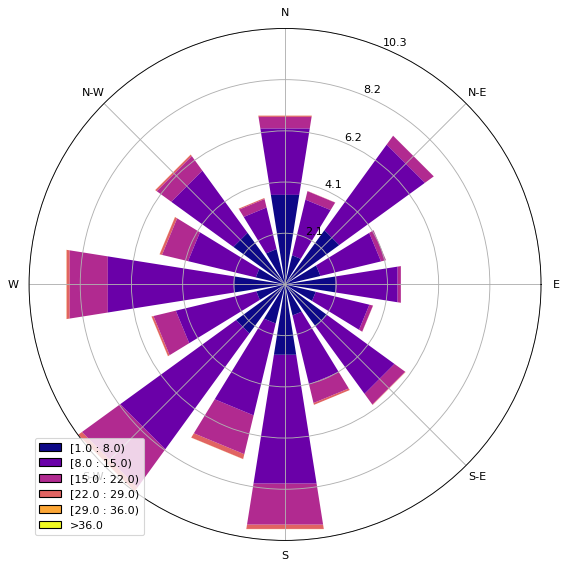

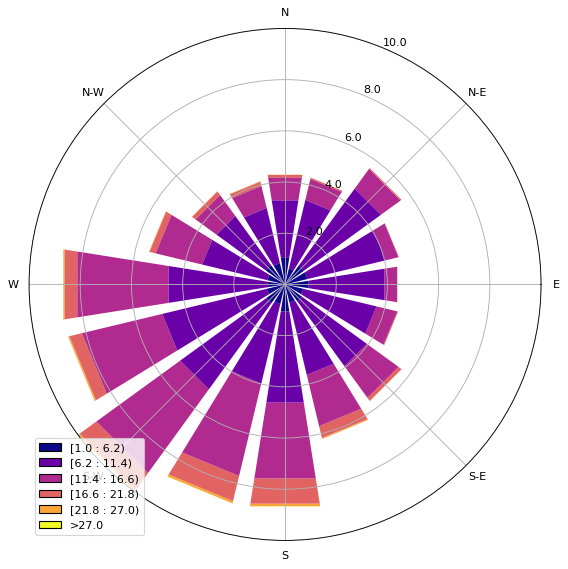

In [11]:
ax = wr.WindroseAxes.from_ax()
ax.bar(df_vinga_pre_1990['Vindriktning'], df_vinga_pre_1990['Max_uppmätta_hastighet'], normed=True, cmap=cm.plasma)
ax.legend()
plt.show()

ax = wr.WindroseAxes.from_ax()
ax.bar(df_vinga_post_1990['Vindriktning'], df_vinga_post_1990['Max_uppmätta_hastighet'], normed=True, cmap=cm.plasma)
ax.legend()
plt.show()

Can older meassurements explain the shorter NNE/NNW etc arms in the first figure?

In [12]:
df_vinga_pre_1960 = df_vinga[df_vinga['Year'] < 1960]
df_vinga_post_1960 = df_vinga[df_vinga['Year'] >= 1960]

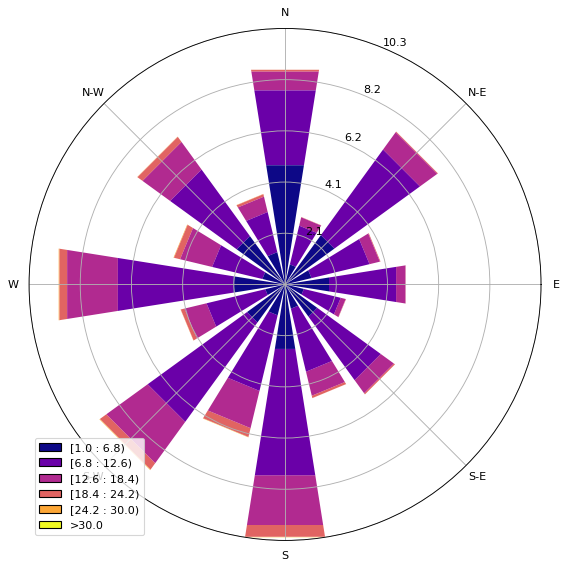

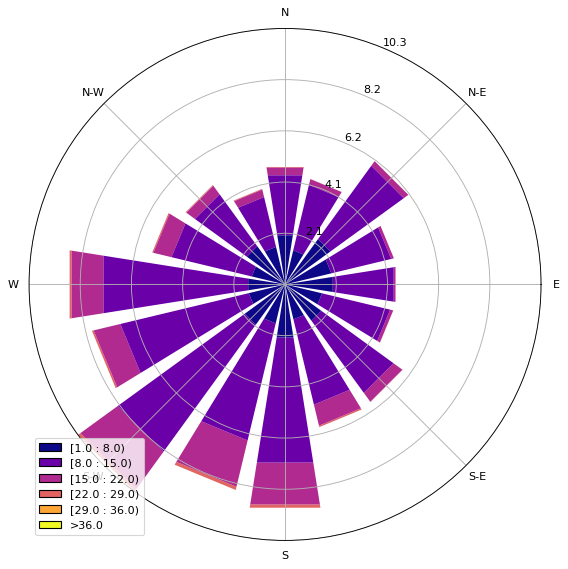

In [13]:
ax = wr.WindroseAxes.from_ax()
ax.bar(df_vinga_pre_1960['Vindriktning'], df_vinga_pre_1960['Max_uppmätta_hastighet'], normed=True, cmap=cm.plasma)
ax.legend()
plt.show()

ax = wr.WindroseAxes.from_ax()
ax.bar(df_vinga_post_1960['Vindriktning'], df_vinga_post_1960['Max_uppmätta_hastighet'], normed=True, cmap=cm.plasma)
ax.legend()
plt.show()

Bar ahård vind och uppåt

In [16]:
df_vinga_hard = df_vinga[df_vinga['Max_uppmätta_hastighet'] >= 13.9]
df_vinga_hard_pre_1990 = df_vinga_hard[df_vinga_hard['Year'] < 1990]
df_vinga_hard_post_1990 = df_vinga_hard[df_vinga_hard['Year'] >= 1990]

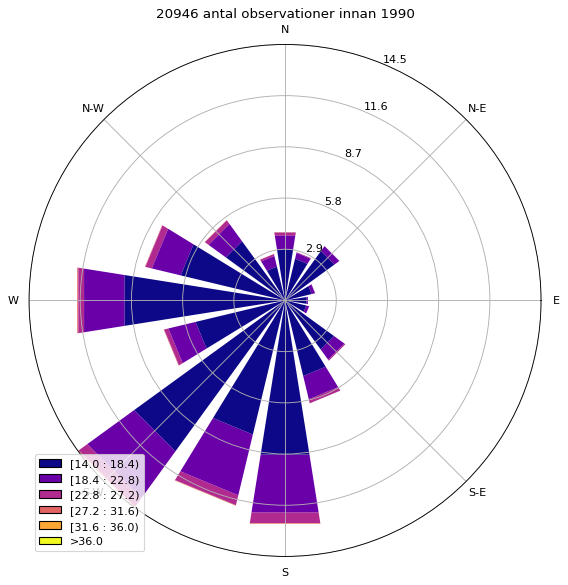

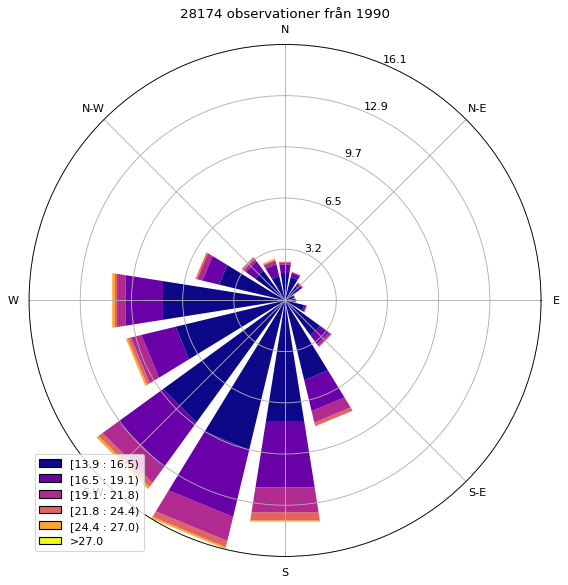

In [18]:
ax = wr.WindroseAxes.from_ax()
ax.bar(df_vinga_hard_pre_1990['Vindriktning'], df_vinga_hard_pre_1990['Max_uppmätta_hastighet'], normed=True, cmap=cm.plasma)
plt.title(f'{len(df_vinga_hard_pre_1990)} antal observationer innan 1990')
ax.legend()
plt.show()

ax = wr.WindroseAxes.from_ax()
ax.bar(df_vinga_hard_post_1990['Vindriktning'], df_vinga_hard_post_1990['Max_uppmätta_hastighet'], normed=True, cmap=cm.plasma)
plt.title(f'{len(df_vinga_hard_post_1990)} observationer från 1990')
ax.legend()
plt.show()

In [22]:
kat_7_vinga_pre_1990 = len(df_vinga_pre_1990[df_vinga_pre_1990['Max_uppmätta_hastighet'] >= 13.9])
kat_8_vinga_pre_1990 = len(df_vinga_pre_1990[df_vinga_pre_1990['Max_uppmätta_hastighet'] >= 17.2])
kat_9_vinga_pre_1990 = len(df_vinga_pre_1990[df_vinga_pre_1990['Max_uppmätta_hastighet'] >= 20.8])
kat_10_vinga_pre_1990 = len(df_vinga_pre_1990[df_vinga_pre_1990['Max_uppmätta_hastighet'] >= 25.5])
kat_11_vinga_pre_1990 = len(df_vinga_pre_1990[df_vinga_pre_1990['Max_uppmätta_hastighet'] >= 28.5])
kat_12_vinga_pre_1990 = len(df_vinga_pre_1990[df_vinga_pre_1990['Max_uppmätta_hastighet'] >= 32.7])

intensity_pre_1990_vinga = [kat_7_vinga_pre_1990, kat_8_vinga_pre_1990, kat_9_vinga_pre_1990, kat_10_vinga_pre_1990, kat_11_vinga_pre_1990, kat_12_vinga_pre_1990]

kat_7_vinga_post_1990 = len(df_vinga_post_1990[df_vinga_post_1990['Max_uppmätta_hastighet'] >= 13.9])
kat_8_vinga_post_1990 = len(df_vinga_post_1990[df_vinga_post_1990['Max_uppmätta_hastighet'] >= 17.2])
kat_9_vinga_post_1990 = len(df_vinga_post_1990[df_vinga_post_1990['Max_uppmätta_hastighet'] >= 20.8])
kat_10_vinga_post_1990 = len(df_vinga_post_1990[df_vinga_post_1990['Max_uppmätta_hastighet'] >= 25.5])
kat_11_vinga_post_1990 = len(df_vinga_post_1990[df_vinga_post_1990['Max_uppmätta_hastighet'] >= 28.5])
kat_12_vinga_post_1990 = len(df_vinga_post_1990[df_vinga_post_1990['Max_uppmätta_hastighet'] >= 32.7])

intensity_post_1990_vinga = [kat_7_vinga_post_1990, kat_8_vinga_post_1990, kat_9_vinga_post_1990, kat_10_vinga_post_1990, kat_11_vinga_post_1990, kat_12_vinga_post_1990]

In [66]:
df_hard_wind_vinga_broad_pre = pd.DataFrame({'Categories': ['>13.9 m/s', '>17.2 m/s', '>20.8 m/s', '>25.5 m/s', '>28.5 m/s', '>32.7 m/s'], 
                                   'Values_pre_1990': intensity_pre_1990_vinga})


In [67]:
df_hard_wind_vinga_broad_pre

,Categories,Values_pre_1992
0,>13.9 m/s,20946
1,>17.2 m/s,6601
2,>20.8 m/s,2181
3,>25.5 m/s,193
4,>28.5 m/s,63
5,>32.7 m/s,8


In [68]:
df_hard_wind_vinga_broad_post = pd.DataFrame({'Categories': ['>13.9 m/s', '>17.2 m/s', '>20.8 m/s', '>25.5 m/s', '>28.5 m/s', '>32.7 m/s'], 
                                   'Values_post_1990': intensity_post_1990_vinga})

In [69]:
df_hard_wind_vinga_broad = pd.concat([df_hard_wind_vinga_broad_pre, df_hard_wind_vinga_broad_post]).reset_index()

In [70]:
df_hard_wind_vinga_broad

,index,Categories,Values_pre_1992,Values_post_1992
0,0,>13.9 m/s,20946.0,NaN
1,1,>17.2 m/s,6601.0,NaN
2,2,>20.8 m/s,2181.0,NaN
3,3,>25.5 m/s,193.0,NaN
4,4,>28.5 m/s,63.0,NaN
5,5,>32.7 m/s,8.0,NaN
6,0,>13.9 m/s,NaN,28174.0
7,1,>17.2 m/s,NaN,7632.0
8,2,>20.8 m/s,NaN,1389.0
9,3,>25.5 m/s,NaN,80.0


<Axes: >

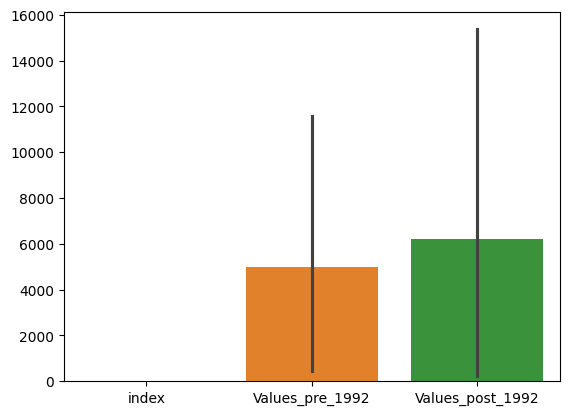

In [74]:
plt.figure()
sns.barplot(df_hard_wind_vinga_broad)

In [93]:
df_hard_wind_vinga_wide = pd.DataFrame({'Tid': ['Före 1990', 'Efter 1990'],
                                    '>13.9': [intensity_pre_1990_vinga[0], intensity_post_1990_vinga[0]],
                                   '>17.2': [intensity_pre_1990_vinga[1], intensity_post_1990_vinga[1]],
                                   '>20.8': [intensity_pre_1990_vinga[2], intensity_post_1990_vinga[2]],
                                   '>25.5': [intensity_pre_1990_vinga[3], intensity_post_1990_vinga[3]],
                                   '>28.5': [intensity_pre_1990_vinga[4], intensity_post_1990_vinga[4]],
                                   '>32.7': [intensity_pre_1990_vinga[5], intensity_post_1990_vinga[5]],})

In [76]:
df_hard_wind_vinga_wide

,Tid,>13.9,>17.2,>20.8,>25.5,>28.5,>32.7
0,Före 1992,20946,6601,2181,193,63,8
1,Efter 1992,28174,7632,1389,80,0,0


In [89]:
categories = ['>13.9', '>17.2', '>20.8', '>25.5', '>28.5', '>32.7']

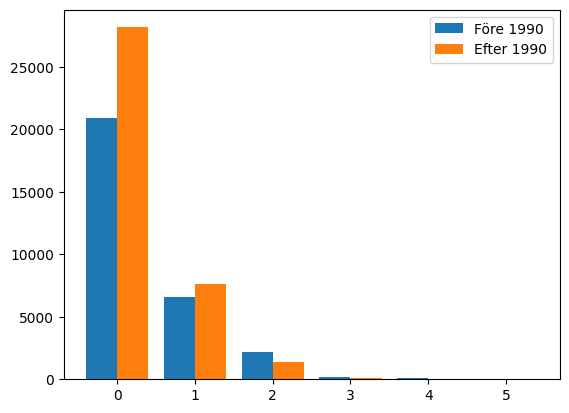

In [99]:
x = np.arange(6)
plt.bar(x - 0.4/2, intensity_pre_1990_vinga, width=0.4)
plt.bar(x + 0.4/2, intensity_post_1990_vinga, width=0.4)
plt.legend(df_hard_wind_vinga_wide['Tid'])
plt.show()


Kolla närmare på de riktigt kraftiga vindarna

In [109]:
storm_vinga_pre_1990 = intensity_pre_1990_vinga[3:]
storm_vinga_post_1990 = intensity_post_1990_vinga[3:]

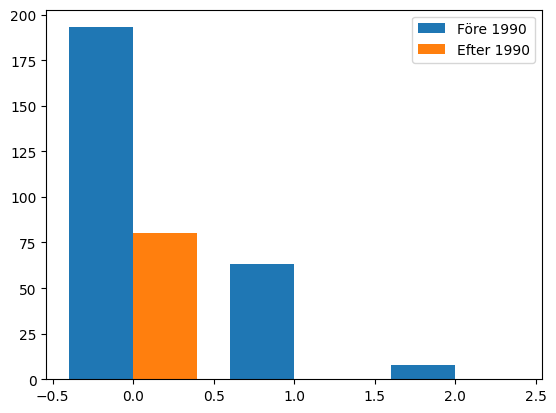

In [115]:
x = np.arange(3)
plt.bar(x - 0.4/2, storm_vinga_pre_1990, width=0.4)
plt.bar(x + 0.4/2, storm_vinga_post_1990, width=0.4)
plt.legend(df_hard_wind_vinga_wide['Tid'])
plt.show()
